In [1]:
import pandas as pd
import numpy as np

In [2]:
import data

In [3]:
group_table, airline_table, order_table, train_set = data.import_data()

import group_table
import airline_table
import order_table
import train_set


In [4]:
order_table.head()

,order_id,group_id,order_date,source_1,source_2,unit,people_amount
0,136100,63695,5-Jan-17,src1_value_1,src2_value_1,unit_value_1,2
1,140370,63695,9-Nov-16,src1_value_1,src2_value_1,unit_value_2,1
2,211009,63695,20-Jan-17,src1_value_1,src2_value_1,unit_value_3,2
3,41571,53481,14-Mar-17,src1_value_1,src2_value_1,unit_value_4,4
4,64125,53481,27-Mar-17,src1_value_2,src2_value_1,unit_value_5,1


In [5]:
main_table = pd.merge(train_set, order_table, on="order_id", how="left")
main_table = pd.merge(main_table, group_table, on="group_id", how="left")

In [7]:
main_table["order_date"] = pd.to_datetime(main_table["order_date"])
main_table["begin_date"] = pd.to_datetime(main_table["begin_date"])

In [26]:
x = main_table["begin_date"]

In [24]:
main_table["order_begin_duration"] = list(map(lambda x_tmp: x_tmp.days, x))

In [9]:
# 下單的年月份與出團的年月份應該有關係
main_table["order_date"] = pd.to_datetime(main_table["order_date"])
main_table["order_year"] = main_table["order_date"].dt.year
pd.crosstab(main_table["order_year"], main_table["deal_or_not"], normalize="index")

deal_or_not,0,1
order_year,,
2016,0.82877,0.17123
2017,0.79606,0.20394


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000232EE4F3780>,
      dtype=object)

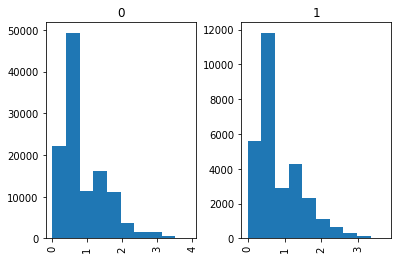

In [18]:
# 下單人數太大的單子通常到最後也不會成交
main_table["people_log"] = np.log(main_table["people_amount"])
main_table.hist(column="people_log", by="deal_or_not")

In [20]:
# 有些單位經手的單子成交率偏高，但是當初處理這個feature的時候沒處理好
pd.crosstab(main_table["unit"], main_table["deal_or_not"], normalize="index")

deal_or_not,0,1
unit,,
unit_value_1,0.799720,0.200280
unit_value_10,0.773797,0.226203
unit_value_100,0.385999,0.614001
unit_value_101,1.000000,0.000000
unit_value_102,0.824324,0.175676
unit_value_103,0.745455,0.254545
unit_value_104,0.435622,0.564378
unit_value_105,0.738462,0.261538
unit_value_106,1.000000,0.000000


In [21]:
# source_1的成交與否結構存在差異
pd.crosstab(main_table["source_1"], main_table["deal_or_not"], normalize="index")

deal_or_not,0,1
source_1,,
src1_value_1,0.817588,0.182412
src1_value_2,0.774715,0.225285
src1_value_3,0.649828,0.350172


In [22]:
pd.crosstab(main_table["source_2"], main_table["deal_or_not"], normalize="index")

deal_or_not,0,1
source_2,,
src2_value_1,0.806773,0.193227
src2_value_2,0.722444,0.277556
src2_value_3,0.820663,0.179337
src2_value_4,0.701888,0.298112


In [ ]:
"""
綜合以上分析，可以得出下列feature
1. order_date -> order_year
              -> order_month
2. people_amount
3. source_1
4. source_2
5. unit
"""